<a href="https://colab.research.google.com/github/CGnal/agos-ai-course/blob/day4/day4/01_Introduction_Networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install \
networkx==2.6.3 \
matplotlib==3.2.2\
pandas==1.3.5\
scipy==1.6.2 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 27.4 MB 48.7 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


### Plot Graphs

In [31]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Undirected Graph

In [32]:
%matplotlib inline

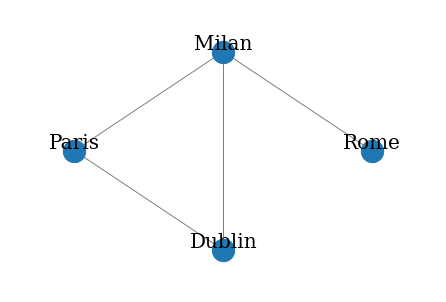

In [33]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [34]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Dublin', 'Rome', 'Milan']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Dublin', 'Milan'), ('Rome', 'Milan')]


In [35]:
{v: G.degree(v) for v in G.nodes}

{'Paris': 2, 'Dublin': 2, 'Rome': 1, 'Milan': 3}

In [36]:
for v in G.nodes:
    print(f"{v}: {list(G.neighbors(v))}")

Paris: ['Milan', 'Dublin']
Dublin: ['Milan', 'Paris']
Rome: ['Milan']
Milan: ['Dublin', 'Paris', 'Rome']


In [37]:
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Neighbors for nodes: {'Paris': ['Milan', 'Dublin'], 'Dublin': ['Milan', 'Paris'], 'Rome': ['Milan'], 'Milan': ['Dublin', 'Paris', 'Rome']}


In [38]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Paris': 2, 'Dublin': 2, 'Rome': 1, 'Milan': 3}
Neighbors for nodes: {'Paris': ['Milan', 'Dublin'], 'Dublin': ['Milan', 'Paris'], 'Rome': ['Milan'], 'Milan': ['Dublin', 'Paris', 'Rome']}


In [39]:
ego_graph_dublin = nx.ego_graph(G, "Dublin")
print(f"Nodes: {ego_graph_dublin.nodes}")
print(f"Edges: {ego_graph_dublin.edges}")

Nodes: ['Paris', 'Dublin', 'Milan']
Edges: [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Dublin', 'Milan')]


In [40]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Paris', 'Dublin', 'Rome', 'Milan']
Edges: [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Dublin', 'Milan'), ('Rome', 'Milan')]


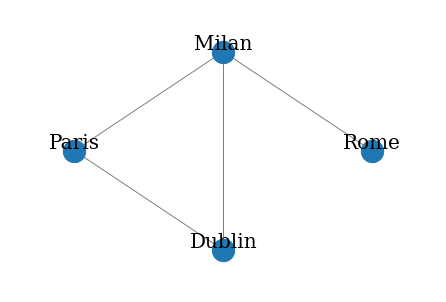

In [41]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

V = ['Paris', 'Dublin', 'Rome', 'Milan', 'London', 'Madrid']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Paris', 'Madrid'), ('Dublin', 'Milan'), ('Rome', 'Milan'), ('Rome', 'London')]


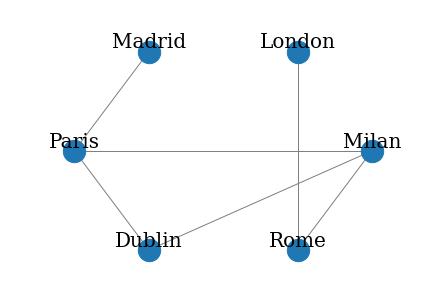

In [42]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

V = ['Paris', 'Dublin', 'Rome', 'Milan']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Dublin', 'Milan'), ('Rome', 'Milan')]


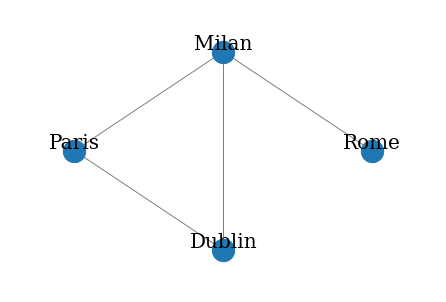

In [43]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

V = ['Paris', 'Dublin', 'Rome', 'Milan']
E = [('Paris', 'Dublin'), ('Rome', 'Milan')]


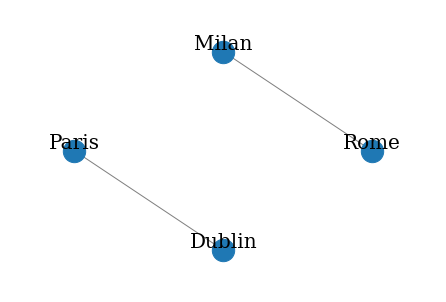

In [44]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

[('Paris', 'Dublin', {}), ('Rome', 'Milan', {})]


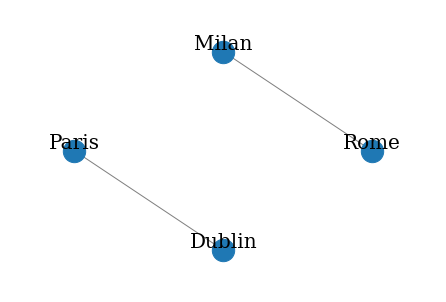

In [45]:
print(nx.to_edgelist(G))
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

        Paris  Dublin  Rome  Milan
Paris     0.0     1.0   0.0    0.0
Dublin    1.0     0.0   0.0    0.0
Rome      0.0     0.0   0.0    1.0
Milan     0.0     0.0   1.0    0.0


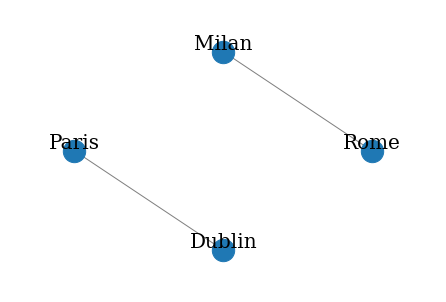

In [46]:
print(nx.to_pandas_adjacency(G))
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

## Directed Graph

  source  target
0  Paris   Milan
1  Paris  Dublin
2  Milan  Dublin
3  Milan    Rome
        Paris  Dublin  Rome  Milan
Paris     0.0     1.0   0.0    1.0
Dublin    0.0     0.0   0.0    0.0
Rome      0.0     0.0   0.0    0.0
Milan     0.0     1.0   1.0    0.0


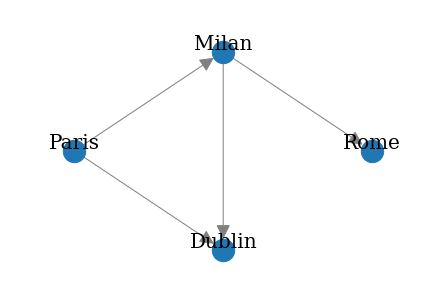

In [47]:
import networkx as nx
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [48]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Paris': 0, 'Dublin': 2, 'Rome': 1, 'Milan': 1}
Outegree for nodes: {'Paris': 2, 'Dublin': 0, 'Rome': 0, 'Milan': 2}


## Weighted Directed Graph

  source  target  weight
0  Paris  Dublin      11
1  Paris   Milan       8
2  Milan    Rome       5
3  Milan  Dublin      19
        Paris  Dublin  Rome  Milan
Paris     0.0    11.0   0.0    8.0
Dublin    0.0     0.0   0.0    0.0
Rome      0.0     0.0   0.0    0.0
Milan     0.0    19.0   5.0    0.0


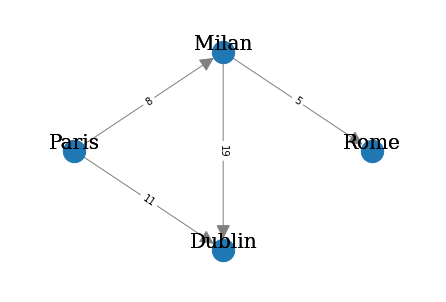

In [49]:
import networkx as nx
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)


## Bipartite Graph

In [50]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),  
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

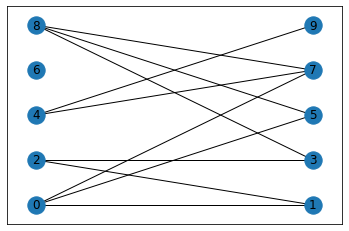

In [51]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

## Multi Graph

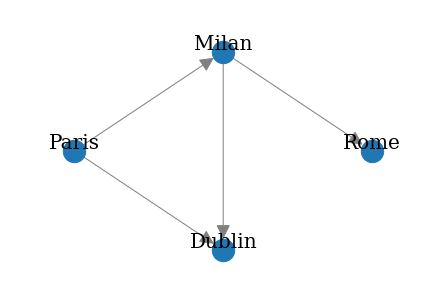

In [52]:
import networkx as nx
directed_multi_graph = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)